In [194]:
import os, sys
lib_path = os.path.join(os.path.expanduser('~'), 'work/lib')
if lib_path not in sys.path:
    sys.path.insert(0, lib_path)
from glcreate import gl

In [205]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [65]:
sales = gl.SFrame('kc_house_data.gl/')
train_data, test_data = sales.random_split(.8, seed=0)

In [68]:
train_data[['sqft_living', 'bedrooms', 'price']].show()

In [51]:
train_data.column_names()
# sqft_living = train_data['sqft_living']
# sqft_living * train_data['price']

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [45]:
def simple_linear_regression(X, y):
    """Solves for the best-fit line using the closed-form solution.
    
    numerator = (mean of X * Y) - (mean of X)*(mean of Y)
    denominator = (mean of X^2) - (mean of X)*(mean of X)
    slope = numerator / denominator
    intercept = mean(y) - slope * mean(X)
    """
    Xy = X * y
    mean_x, mean_x2, mean_y, mean_xy = X.mean(), (X**2).mean(), y.mean(), Xy.mean()
    slope = (mean_xy - mean_x * mean_y) / (mean_x2 - (mean_x**2))
    intercept = mean_y - slope * mean_x
    return intercept, slope

In [46]:
sqft_living = train_data['sqft_living']
price = train_data['price']
b, m = simple_linear_regression(sqft_living, price)
print("y = {b} + {m}x".format(b=b, m=m))

y = -47116.0765749 + 281.958838568x


In [60]:
def inverse_regression_predictions(y, b, m):
    """Calculates expected input based off of the output."""
    return (y - b) / m

In [32]:
def predict(intercept, slope, x):
    return intercept + slope * x

In [47]:
print("Quiz Question: Using your Slope and Intercept from (4), "
      "What is the predicted price for a house with 2650 sqft?")
print("Answer: ${:.2f}".format(predict(b, m, 2650.)))

Quiz Question: Using your Slope and Intercept from (4), What is the predicted price for a house with 2650 sqft?
Answer: $700074.85


In [57]:
print("Quiz Question: According to this function and the slope and "
      "intercept from (4) What is the RSS for the simple linear "
      "regression using squarefeet to predict prices on TRAINING data?")

def rss(X, y, h, b, m, verbose=False):
    err = 0.
    for i, x in enumerate(X):
        h = predict(b, m, x)
        e = (y[i] - h)**2
        err += e
        if verbose and i % 1000 == 0:
            print("Error @ {:d}) ({} - {})^2 = {}".format(i, y[i], h, e))
    return err

Quiz Question: According to this function and the slope and intercept from (4) What is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?


In [64]:
print("Answer: {:.2e}".format(rss(sqft_living, price, predict, b, m, verbose=True)))

Error @ 0) (221900.0 - 285595.352935)^2 = 4057097985.51
Error @ 1000) (467000.0 - 429394.360604)^2 = 1414184114.35
Error @ 2000) (575000.0 - 398378.888362)^2 = 31195017076.2
Error @ 3000) (460000.0 - 240481.938764)^2 = 48188179208.8
Error @ 4000) (385000.0 - 542177.896032)^2 = 24704891000.9
Error @ 5000) (277000.0 - 375822.181277)^2 = 9765823512.27
Error @ 6000) (390000.0 - 429394.360604)^2 = 1551915647.43
Error @ 7000) (500000.0 - 339167.532263)^2 = 25867082678.4
Error @ 8000) (440000.0 - 632404.724373)^2 = 37019577961.1
Error @ 9000) (442250.0 - 564734.603117)^2 = 15002478000.7
Error @ 10000) (185000.0 - 471688.18639)^2 = 82190116215.4
Error @ 11000) (399000.0 - 282775.764549)^2 = 13508072906.1
Error @ 12000) (638000.0 - 437853.125762)^2 = 40058771267.4
Error @ 13000) (310000.0 - 296873.706478)^2 = 172299581.635
Error @ 14000) (775000.0 - 849513.03007)^2 = 5552191650.26
Error @ 15000) (249000.0 - 474507.774775)^2 = 50853756484.1
Error @ 16000) (598950.0 - 370183.004505)^2 = 523343382

In [61]:
print("Quiz Question: According to this function and the regression "
      "slope and intercept from (3) what is the estimated square-feet "
      "for a house costing $800,000?")
ans = inverse_regression_predictions(800000, b, m)
print("Answer: {:.2f}".format(ans))

Quiz Question: According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?
Answer: 3004.40


In [77]:
print("Quiz Question: Which model (square feet or bedrooms) has lowest "
      "RSS on TEST data? Think about why this might be the case.")
print("$/sqft. living space = ${:.2f}".format(m))
err_sqft = rss(sqft_living, price, predict, b, m)
bedrooms = train_data['bedrooms']
bedroom_intercept, bedroom_slope = simple_linear_regression(bedrooms, price)
err_bedroom = rss(bedrooms, price, predict, bedroom_intercept, bedroom_slope)
print("$/bedroom = ${:.2f}".format(bedroom_slope))
print("Answer: {} produces *lower* error".format(
    "Sqft" if err_sqft < err_bedroom else "Bedrooms"))

Quiz Question: Which model (square feet or bedrooms) has lowest RSS on TEST data? Think about why this might be the case.
$/sqft. living space = $281.96
$/bedroom = $127588.95
Answer: Sqft produces *lower* error


## Week 2, Assignment 1
[Link](https://www.coursera.org/learn/ml-regression/supplement/7xN9c/reading-exploring-different-multiple-regression-models-for-house-price)

In [117]:
import graphlab.numpy
train_data.show()

In [143]:
bathrooms = train_data['bathrooms']
# Squaring values increases the separation between values
train_data['bedrooms_sqrd'] = bedrooms * bedrooms
test_data['bedrooms_sqrd'] = test_data['bedrooms'] * test_data['bedrooms']

# Captures the 'interaction' between bedrooms and bathrooms, requiring
# both variables to be large for a large value 
train_data['bed_bath_rooms'] = bedrooms * bathrooms
test_data['bed_bath_rooms'] = test_data['bedrooms'] * test_data['bathrooms']

# Taking the log compresses large values, while spreading out smaller values
train_data['log_sqft_living'] = np.log(sqft_living)
test_data['log_sqft_living'] = np.log(test_data['sqft_living'])

# A non-sensical combination, for comparison purposes
lat, longitude = train_data['lat'], train_data['long'] 
train_data['lat_plus_long'] = lat + longitude
test_data['lat_plus_long'] = test_data['lat'] + test_data['long']

new_features = ['bedrooms_sqrd', 'bed_bath_rooms', 'log_sqft_living', 'lat_plus_long']

In [227]:
train_data['ones'] = np.ones(len(train_data))
test_data['ones'] = np.ones(len(test_data))

In [118]:
from scipy import linalg
# http://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html#solving-linear-least-squares-problems-and-pseudo-inverses
def ols_weights(X, y):
    """Find the minimal weights for a linear system through least-square"""
    if isinstance(X, gl.SFrame):
        X = graphlab.numpy.array(X)
    if isinstance(y, gl.SArray):
        y = graphlab.numpy.array(y)\
    # Find the psuedo-inverse of X
    # (X^T*X)^-1 * X^T
    Xt = linalg.inv(X.T.dot(X)).dot(X.T)
    return Xt.dot(y)

In [165]:
def print_weights(method, w, feature_names):
    import textwrap
    header = "Estimated weights for {:d} features using {}".format(len(w), method)
    print(textwrap.dedent("""
            {hdr}
            Features: {fs}
            {hdr_break}
            Intercept|w0: {w0:.2e}
                Features: {w:s} 
            """.format(
                hdr=header,
                fs=feature_names,
                hdr_break="="*len(header),
                w0=w[0], 
                w=w[1:]) # ['{:.2f}'.format(x) for x in w[1:]])
        )
    )
    
def print_all_weights(model):
    for method, data in model['models'].items():
        print_weights(method, data['weights'], model['feature_names'])

In [166]:
def build_linear_models(feature_names):
    mdl = {
        'feature_names': feature_names,
        'X': graphlab.numpy.array(train_data[feature_names]),
        'y': graphlab.numpy.array(train_data['price']),
        'models': {}
    }
    mdl['models']['ols'] = {'weights': ols_weights(mdl['X'], mdl['y'])}
    mdl['models']['scipy.linalg.lstsq'] = {'weights': linalg.lstsq(mdl['X'], mdl['y'])[0]}
    return mdl

In [179]:
model1 = build_linear_models(['ones', 'sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long'])
print_all_weights(model1)
# linreg_models = [model1]


          Estimated weights for 6 features using scipy.linalg.lstsq
          Features: ['ones', 'sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
          Intercept|w0: -6.91e+07
              Features: [  3.12258535e+02  -5.95858879e+04   1.57061089e+04   6.58622995e+05
-3.09365335e+05] 


          Estimated weights for 6 features using ols
          Features: ['ones', 'sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
          Intercept|w0: -6.91e+07
              Features: [  3.12258535e+02  -5.95858879e+04   1.57061089e+04   6.58622995e+05
-3.09365335e+05] 



In [183]:
# Model 2: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’,‘long’, and ‘bed_bath_rooms’
model2 = build_linear_models(model1['feature_names'] + ['bed_bath_rooms'])
print_all_weights(model2)
# linreg_models.append(model2)


          Estimated weights for 7 features using scipy.linalg.lstsq
          Features: ['ones', 'sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms']
          Intercept|w0: -6.69e+07
              Features: [  3.06609917e+02  -1.13445239e+05  -7.14611659e+04   6.54848601e+05
-2.94287544e+05   2.55794155e+04] 


          Estimated weights for 7 features using ols
          Features: ['ones', 'sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms']
          Intercept|w0: -6.69e+07
              Features: [  3.06609917e+02  -1.13445239e+05  -7.14611659e+04   6.54848601e+05
-2.94287544e+05   2.55794155e+04] 



In [184]:
# Model 3: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’,‘long’, ‘bed_bath_rooms’, ‘bedrooms_squared’, 
#          ‘log_sqft_living’, and ‘lat_plus_long’
model3 = build_linear_models(model2['feature_names'] + ['bedrooms_sqrd', 'log_sqft_living', 'lat_plus_long'])
print_all_weights(model3)
# linreg_models.append(model3)


          Estimated weights for 10 features using scipy.linalg.lstsq
          Features: ['ones', 'sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms', 'bedrooms_sqrd', 'log_sqft_living', 'lat_plus_long']
          Intercept|w0: -6.20e+07
              Features: [  5.29426831e+02   3.45198164e+04   6.70626341e+04   5.34087018e+05
-4.06750900e+05  -8.57108317e+03  -6.78904368e+03  -5.61841347e+05
 1.27336119e+05] 


          Estimated weights for 10 features using ols
          Features: ['ones', 'sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long', 'bed_bath_rooms', 'bedrooms_sqrd', 'log_sqft_living', 'lat_plus_long']
          Intercept|w0: -6.20e+07
              Features: [  5.29426831e+02   3.45198165e+04   6.70626340e+04   0.00000000e+00
 0.00000000e+00   0.00000000e+00   0.00000000e+00  -5.61841347e+05
-5.22201373e+06] 



In [185]:
linreg_models = [model1, model2, model3]

In [170]:
print("Quiz Question: what are the mean (arithmetic average) values of "
      "your 4 new variables on TEST data? (round to 2 digits)")
for nf in new_features:
    print("mean({}): {:.2f}".format(nf, test_data[nf].mean()))

Quiz Question: what are the mean (arithmetic average) values of your 4 new variables on TEST data? (round to 2 digits)
mean(bedrooms_sqrd): 12.45
mean(bed_bath_rooms): 7.50
mean(log_sqft_living): 7.55
mean(lat_plus_long): -74.65


In [172]:
print("Quiz Question: What is the sign (positive or negative) for the "
      "coefficient/weight for ‘bathrooms’ in Model 1?")
bathroom_idx = model1['feature_names'].index('bathrooms')
print("Model 1 coeff('bathrooms'): {:.2f}".format(model1['models']['ols']['weights'][bathroom_idx]))

Quiz Question: What is the sign (positive or negative) for the coefficient/weight for ‘bathrooms’ in Model 1?
Model 1 coeff('bathrooms'): 15706.11


In [173]:
print("Quiz Question: What is the sign (positive or negative) for the "
      "coefficient/weight for ‘bathrooms’ in Model 2?")
bathroom_idx = model2['feature_names'].index('bathrooms')
print("Model 2 coeff('bathrooms'): {:.2f}".format(model2['models']['ols']['weights'][bathroom_idx]))

Quiz Question: What is the sign (positive or negative) for the coefficient/weight for ‘bathrooms’ in Model 2?
Model 2 coeff('bathrooms'): -71461.17


In [222]:
def evaluate_linear_model(model, X):
    for method, data in model['models'].items():
        # h = y - Xw
        h = model['y'] - X.dot(data['weights'])
        # RSS = h^2 = h.T * h 
        data['rss'] =  h.T.dot(h)
        print('RSS of {m} (train): {err:.2e}'.format(m=method, err=data['rss']))

In [224]:
print("Quiz Question: Which model (1, 2 or 3) had the lowest RSS on "
      "TRAINING data?")
# from numpy import finfo
import sys
best_model = ('model number', 'method', sys.float_info.max)
for i, model in enumerate(linreg_models):
    print("Model {:d}".format(i+1))
    evaluate_linear_model(model, train_data[model['feature_names']].to_numpy())
    for method in model['models']:
        err = model['models'][method]['rss']
        if err < best_model[2]:
            best_model = (i+1, method, err)
print(best_model)

Quiz Question: Which model (1, 2 or 3) had the lowest RSS on TRAINING data?
Model 1
RSS of scipy.linalg.lstsq (train): 9.68e+14
RSS of ols (train): 9.68e+14
Model 2
RSS of scipy.linalg.lstsq (train): 9.58e+14
RSS of ols (train): 9.58e+14
Model 3
RSS of scipy.linalg.lstsq (train): 9.03e+14
RSS of ols (train): 1.83e+21
(3, 'scipy.linalg.lstsq', 903438924951753.5)


In [203]:
def predict(model, X):
    p = X.dot(model['weights'])
    model['predictions'] = p
    return p

['scipy.linalg.lstsq', 'ols']

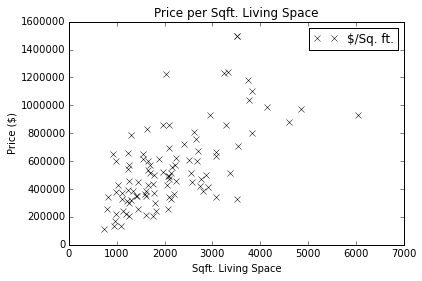

In [218]:
mdl = linreg_models[2]
sample_indices = np.random.randint(len(mdl['y']), size=100)
X_sample = train_data['sqft_living'].to_numpy()[sample_indices]
y_sample = mdl['y'][sample_indices]

plt.plot(X_sample, y_sample, 'kx', label='$/Sq. ft.')
plt.xlabel('Sqft. Living Space')
plt.ylabel('Price ($)')
plt.title('Price per Sqft. Living Space')
plt.legend()
plt.show()

In [162]:
print("Quiz Question: Which model (1, 2, or 3) had the lowest RSS on "
      "TESTING data?")

Quiz Question: Which model (1, 2, or 3) had the lowest RSS on TESTING data?


In [240]:
test_err = ('model number', 'method', sys.float_info.max)
for i, model in enumerate(linreg_models):
    for method in model['models']:
        h = test_data[model['feature_names']].to_numpy().dot(model['models'][method]['weights'])
        err = h.T.dot(h)
        print("Model {:d} using {:s}: RSS = {:.2e}".format(
              i+1, method, err))
        if err < test_err[2]:
            test_err = (i+1, method, err)
print("Model {:d} using {:s} performed the best w/ RSS = {:.2e}".format(
    *test_err))

Model 1 using scipy.linalg.lstsq: RSS = 1.57e+15
Model 1 using ols: RSS = 1.57e+15
Model 2 using scipy.linalg.lstsq: RSS = 1.57e+15
Model 2 using ols: RSS = 1.57e+15
Model 3 using scipy.linalg.lstsq: RSS = 1.61e+15
Model 3 using ols: RSS = 4.46e+20
Model 1 using scipy.linalg.lstsq performed the best w/ RSS = 1.57e+15


## Assignment 2, Week 2
[Link](https://www.coursera.org/learn/ml-regression/supplement/tcfe4/reading-implementing-gradient-descent-for-multiple-regression)

In [3]:
import mlsl

In [4]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1
    f = ['constant'] + features
    features_matrix = data_sframe[f].to_numpy()
    return features_matrix, output.to_numpy()

Quiz Question: What is the value of the weight for sqft_living -- the second element of ‘simple_weights’ 
    (rounded to 1 decimal place)?

Quiz Question: What is the predicted price for the 1st house in the Test data set for model 1 (round to nearest dollar)?

Quiz Question: What is the predicted price for the 1st house in the TEST data set for model 2 (round to nearest dollar)?

Quiz Question: Which estimate was closer to the true price for the 1st house on the TEST data set, model 1 or model 2?

Quiz Question: Which model (1 or 2) has lowest RSS on all of the TEST data?